## Credit Score Modeling

In this document we outline one important application of advanced analytics. We showcase a solution
to a common business problem in banking, namely assessing the likelihood of a client’s default. This is
done through the development of a credit scoring model.


## Table of Contents

1. [Introduction to Credit Scoring](#section1)<br>
2. [Exploratory Data Analysis](#section2)
3. [Different Method Of Solving](#section3)<br/>
    3.1. [First Method](#section301)<br/>
    3.2. [Second Method](#section302)<br/>
    3.3. [Final Method](#section303)<br/>
4. [Conclusion](#section4)<br/>  

<a id=section1></a>
## Introduction to Credit Scoring

A credit scoring model is a tool that is typically used in the decision-making process of accepting or
rejecting a loan. A credit scoring model is the result of a statistical model which, based on information
about the borrower (e.g. age, number of previous loans, etc.), allows one to distinguish between "good"
and "bad" loans and give an estimate of the probability of default.

A credit scoring model is just one of the factors used in evaluating a credit application. Assessment by
a credit expert remains the decisive factor in the evaluation of a loan.
The history of developing credit-scoring
models goes as far back as the history of
borrowing and repaying. It reflects the
desire to issue an appropriate rate of
interest for undertaking the risk of giving
away one’s own money.
With the advent of the modern statistics
era in the 20th century appropriate
techniques have been developed to
assess the likelihood of someone’s
default on the payment, given the
resemblance of his/her characteristics to those who have already defaulted in the past. In this
document we will focus on one of the most prominent methods to do credit scoring, the logistic
regression. Despite being one of the earliest methods of the subject, it is also one of the most
successful, owing to its transparency.
Although credit scoring methods are linked to the aforementioned applications in banking and finance,
they can be applied to a large variety of other data analytics problems, such as:

1. Which factors contribute to a consumer’s choice?
2. Which factors generate the biggest impact to a consumer’s choice?
3. What is the profit associated with a further boost in each of the impact factors?
4. How likely is that a customer likes to adopt a new service?
5. What is the likelihood that a customer will go to a competitor?

Such questions can all be answered within the same statistical framework. A logistic regression model
can, for example, provide not only the structure of dependencies of the explanatory variables to the
default but also the statistical significance of each variable.
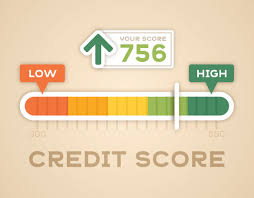

<a id=section2></a>
## Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

### Why EDA?
- to summarize our data and get familier with data.
- to find hidden patterns and to prepare our data for machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/harsh22chauhan/Data-Sets/master/Datasets/Loan%20Data.csv")

C:\Users\Harsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,CustomerID,Loan Amount,Date.of.Birth,Employment.Type,Cibil Score,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,loan_default
0,1.0,50578.0,01-01-1984,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,47145.0,31-07-1985,Self employed,598.0,1.0,1.0,1.0,27600.0,50200.0,50200.0,1991.0,0.0,1.0,0.0,1.0
2,3.0,53278.0,24-08-1985,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,57513.0,30-12-1993,Self employed,305.0,3.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0
4,5.0,52378.0,09-12-1977,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [4]:
import pandas_profiling

report = pandas_profiling.ProfileReport(data)
report

Number of variables,16
Number of observations,233154
Total Missing (%),68.6%
Total size in memory,28.5 MiB
Average record size in memory,128.0 B
Numeric,12
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [5]:
data.isnull().sum()

CustomerID                             182654
Loan Amount                            182654
Date.of.Birth                          182654
Employment.Type                        184628
Cibil Score                            182654
PRI.NO.OF.ACCTS                        182654
PRI.ACTIVE.ACCTS                       182654
PRI.OVERDUE.ACCTS                      182654
PRI.CURRENT.BALANCE                    182654
PRI.SANCTIONED.AMOUNT                  182654
PRI.DISBURSED.AMOUNT                   182654
PRIMARY.INSTAL.AMT                     182654
NEW.ACCTS.IN.LAST.SIX.MONTHS           182654
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    182654
NO of Loan Inquiries                   182654
loan_default                           182654
dtype: int64

In [6]:
data.shape

(233154, 16)

In [7]:
data = data.dropna(axis=0, subset=['CustomerID'])

In [8]:
data.shape

(50500, 16)

In [9]:
data.isnull().sum()

CustomerID                                0
Loan Amount                               0
Date.of.Birth                             0
Employment.Type                        1974
Cibil Score                               0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
PRIMARY.INSTAL.AMT                        0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
NO of Loan Inquiries                      0
loan_default                              0
dtype: int64

In [10]:
import pandas_profiling

report2 = pandas_profiling.ProfileReport(data)
report2

Number of variables,16
Number of observations,50500
Total Missing (%),0.2%
Total size in memory,6.5 MiB
Average record size in memory,136.0 B
Numeric,11
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 16 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Date.of.Birth                          50500 non-null object
Employment.Type                        48526 non-null object
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquiries     

In [12]:
data['Date.of.Birth']  =  pd.to_datetime(data['Date.of.Birth'],infer_datetime_format=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 16 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Date.of.Birth                          50500 non-null datetime64[ns]
Employment.Type                        48526 non-null object
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquir

Text(0.5, 1.08, 'Loan Amount Distribution')

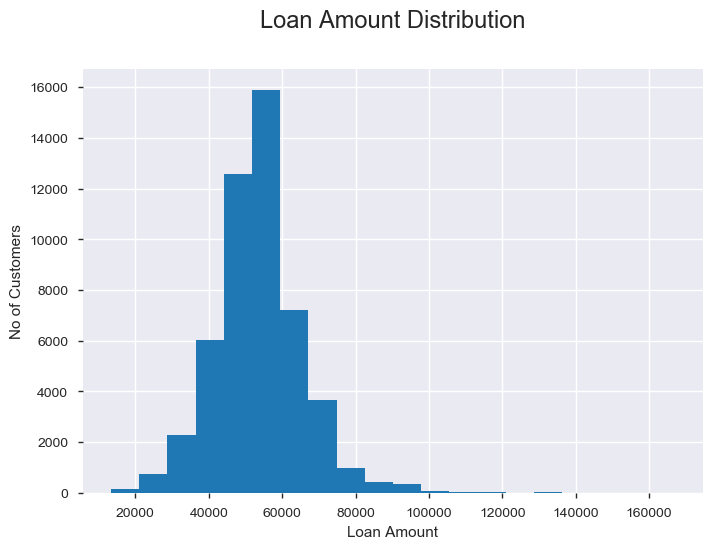

In [14]:
plt = data['Loan Amount'].hist(bins=20)
plt.set_ylabel('No of Customers')
plt.set_xlabel('Loan Amount')
plt.set_title('Loan Amount Distribution',size = 17,y=1.08)

Text(0.5, 1.08, 'Cibil Score Distribution')

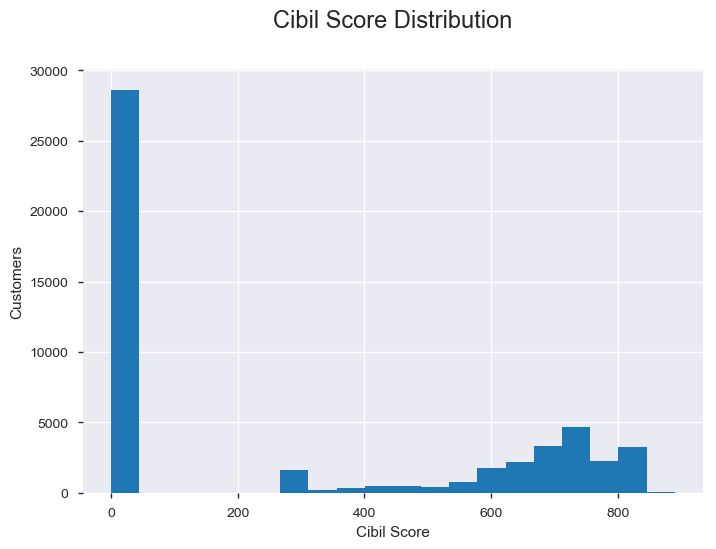

In [15]:
plt = data['Cibil Score'].hist(bins=20)
plt.set_ylabel('Customers')
plt.set_xlabel('Cibil Score')
plt.set_title('Cibil Score Distribution',size = 17,y=1.08)

Text(0.5, 1.08, 'PRI.NO.OF.ACCTS Distribution')

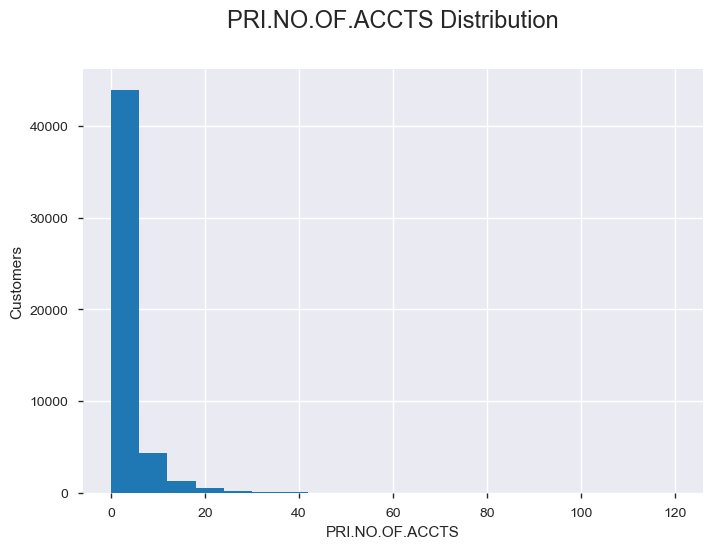

In [16]:
plt = data['PRI.NO.OF.ACCTS'].hist(bins=20)
plt.set_ylabel('Customers')
plt.set_xlabel('PRI.NO.OF.ACCTS')
plt.set_title('PRI.NO.OF.ACCTS Distribution',size = 17,y=1.08)

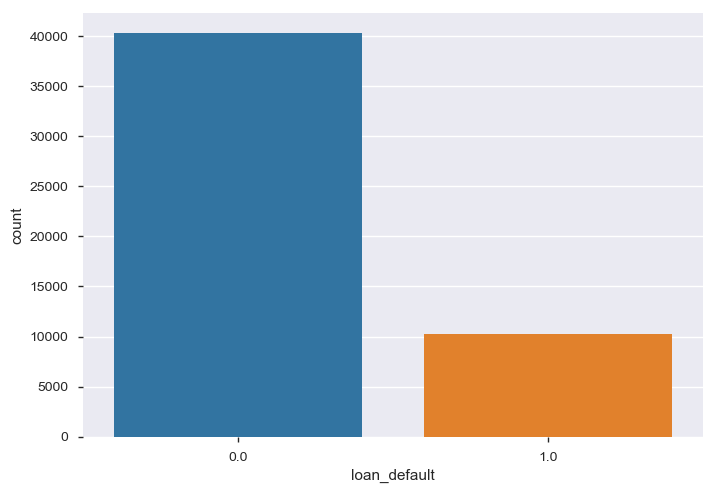

In [17]:
sns.countplot(x = 'loan_default', data = data)

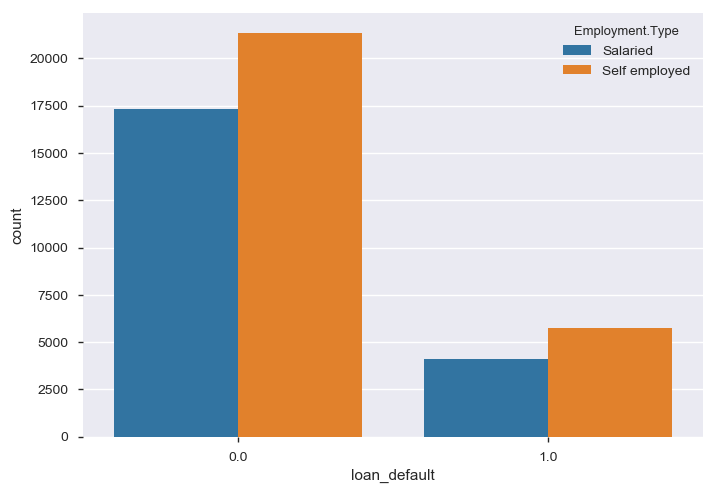

In [18]:
sns.countplot(x = 'loan_default', hue = 'Employment.Type',data = data)

Self Employed are more defaulters then employed

In [19]:
data.columns

Index(['CustomerID', 'Loan Amount', 'Date.of.Birth', 'Employment.Type',
       'Cibil Score', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO of Loan Inquiries', 'loan_default'],
      dtype='object')

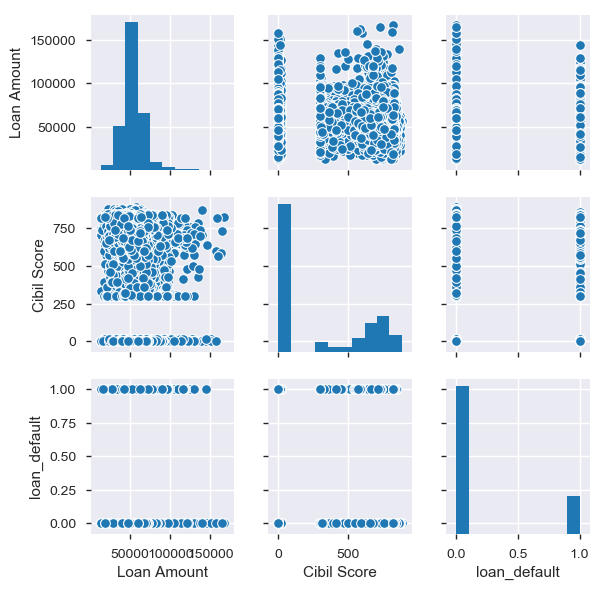

In [20]:
g = sns.pairplot(data, height=2,
                   vars=['Loan Amount', 'Cibil Score','loan_default'])

In [21]:
loan_model = data.copy()

In [22]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 16 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Date.of.Birth                          50500 non-null datetime64[ns]
Employment.Type                        48526 non-null object
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquir

In [23]:
loan_model['Birth year'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).year

In [24]:
loan_model['Birth Month'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).month

In [25]:
loan_model['Day of Birth'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).day

In [26]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 19 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Date.of.Birth                          50500 non-null datetime64[ns]
Employment.Type                        48526 non-null object
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquir

In [27]:
loan_model.head()

,CustomerID,Loan Amount,Date.of.Birth,Employment.Type,Cibil Score,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,loan_default,Birth year,Birth Month,Day of Birth
0,1.0,50578.0,1984-01-01,Salaried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984,1,1
1,2.0,47145.0,1985-07-31,Self employed,598.0,1.0,1.0,1.0,27600.0,50200.0,50200.0,1991.0,0.0,1.0,0.0,1.0,1985,7,31
2,3.0,53278.0,1985-08-24,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,8,24
3,4.0,57513.0,1993-12-30,Self employed,305.0,3.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,1993,12,30
4,5.0,52378.0,1977-09-12,Self employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1977,9,12


In [28]:
a = pd.get_dummies(loan_model['Employment.Type'])

In [29]:
loan_model = pd.concat([loan_model,a],axis = 1)

In [30]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 21 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Date.of.Birth                          50500 non-null datetime64[ns]
Employment.Type                        48526 non-null object
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquir

In [31]:
loan_model.drop(['Date.of.Birth', 'Employment.Type'],axis = 1, inplace = True)

In [32]:
loan_model.drop(['CustomerID'],axis = 1, inplace = True)

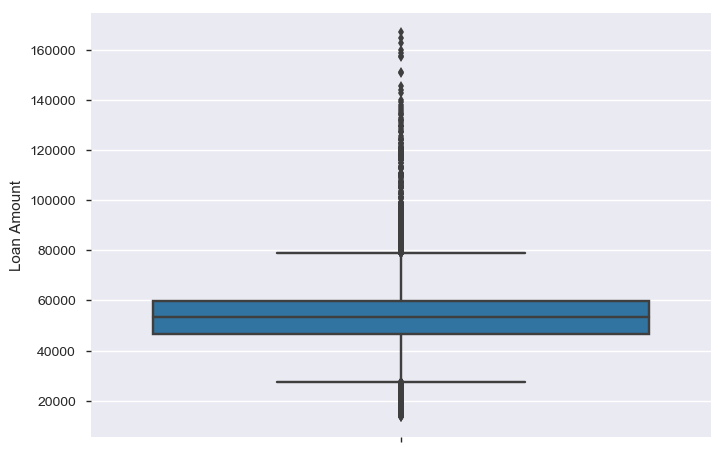

In [33]:
sns.boxplot(y = loan_model['Loan Amount'])

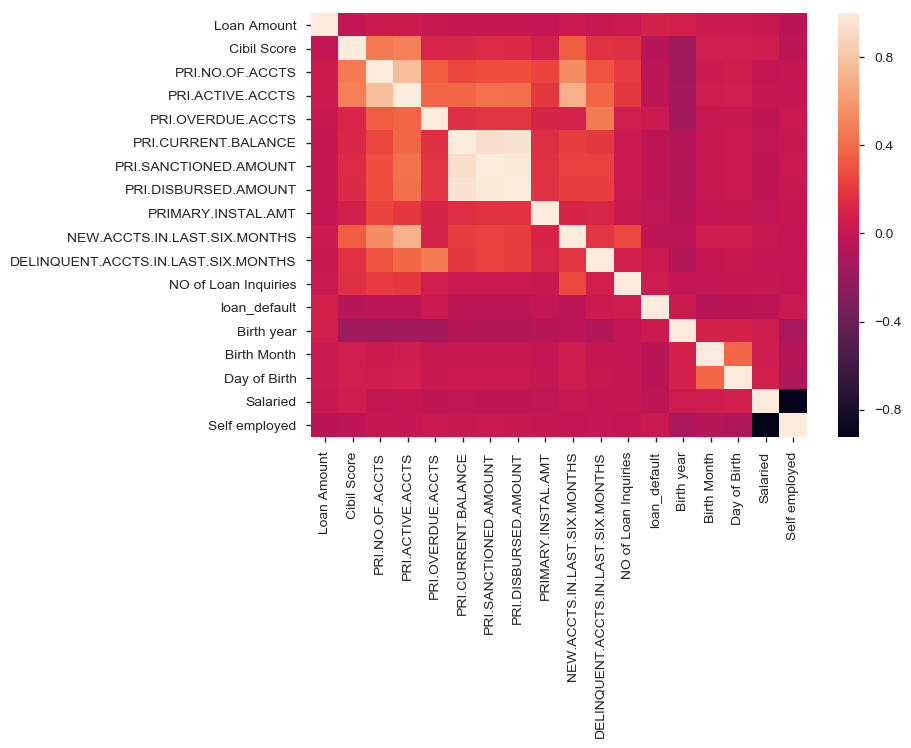

In [34]:
sns.heatmap(loan_model.corr())

<a id=section3></a>
## Different Method Of Solving the problem

<a id=section301></a>
## First Method 
 In This we method we take loan amount as our taret variable for deciding credit limit. We perform linear Regression for predicting the target values.
 
 ### Reason for choosing this method
 
As I am layman to credit Industry, I didn't have much idea about Credit Scoring. One of my friend told me that you have to take loan amount as Target Variable and generate a linear equation for deciding the credit limit.So, lets see this

In [35]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 18 columns):
Loan Amount                            50500 non-null float64
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquiries                   50500 non-null float64
loan_default                           50500 non-null float64
Birth year                             50500 non-null int64
Birth Month              

In [36]:
x = loan_model.iloc[:,1:]
y = loan_model.iloc[:,0]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_predi = reg.predict(x_test)

In [39]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan Amount   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     37.36
Date:                Thu, 25 Jul 2019   Prob (F-statistic):          7.40e-123
Time:                        08:14:40   Log-Likelihood:            -3.8188e+05
No. Observations:               35350   AIC:                         7.638e+05
Df Residuals:                   35332   BIC:                         7.640e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -8.383e+04   1.37e+04     -6.114      0.000   -1.11e+05    -5.7e+04
Cibil Score                            -0.6662      0.220     -3.031      0.002      -1.097      -0.235
PRI.NO.OF.ACCTS                        63.8555     22.503      2.838      0.005      19.749     107.962
PRI.ACTIVE.ACCTS                      108.6470     74.963      1.449      0.147     -38.284     255.577
PRI.OVERDUE.ACCTS                     183.3343    150.609      1.217      0.224    -111.864     478.533
PRI.CURRENT.BALANCE                     0.0003      0.000      0.972      0.331      -0.000       0.001
PRI.SANCTIONED.AMOUNT                5.101e-05      0.000      0.206      0.837      -0.000       0.001
PRI.DISBURSED.AMOUNT                   -0.0003      0.000     -0.772      0.440      -0.001       0.000
PRIMARY.INSTAL.AMT                   9.619e-05      0.001      0.172      0.864      -0.001       0.001
NEW.ACCTS.IN.LAST.SIX.MONTHS          165.5586    106.588      1.553      0.120     -43.357     374.474
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   127.4368    209.056      0.610      0.542    -282.319     537.192
NO of Loan Inquiries                  328.4184     92.950      3.533      0.000     146.234     510.603
loan_default                         2554.4190    158.310     16.136      0.000    2244.127    2864.711
Birth year                             69.9456      6.878     10.170      0.000      56.465      83.427
Birth Month                            49.4250     18.208      2.714      0.007      13.737      85.113
Day of Birth                           23.1769      7.560      3.066      0.002       8.359      37.995
Salaried                            -2296.1086    344.268     -6.670      0.000   -2970.884   -1621.333
Self employed                       -2856.7267    343.292     -8.322      0.000   -3529.590   -2183.863
==============================================================================
Omnibus:                     5727.518   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24278.709
Skew:                           0.749   Prob(JB):                         0.00
Kurtosis:                       6.774   Cond. No.                     4.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now We have values of coefficients we can generate a equation with the help of thes coeeficients. One Problem with that method is We are unable to explain more variance as our Adjusted R value is low. So we decide to do further Implimentations.

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predi))

In [41]:
rms

12127.559087717771

In [42]:
loan_model2 = loan_model.copy()

In [43]:
loan_model2.columns

Index(['Loan Amount', 'Cibil Score', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO of Loan Inquiries', 'loan_default', 'Birth year', 'Birth Month',
       'Day of Birth', 'Salaried', 'Self employed'],
      dtype='object')

In [44]:
loan_model2.drop([ 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],axis= 1,inplace = True)

In [45]:
x2 = loan_model2.iloc[:,1:]
y2 = loan_model2.iloc[:,0]

In [46]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 9 columns):
Cibil Score             50500 non-null float64
PRI.NO.OF.ACCTS         50500 non-null float64
NO of Loan Inquiries    50500 non-null float64
loan_default            50500 non-null float64
Birth year              50500 non-null int64
Birth Month             50500 non-null int64
Day of Birth            50500 non-null int64
Salaried                50500 non-null uint8
Self employed           50500 non-null uint8
dtypes: float64(4), int64(3), uint8(2)
memory usage: 3.2 MB


In [47]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test  = train_test_split(x2,y2,test_size = 0.3,random_state = 0)

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x2_train,y2_train)
y_predi2 = reg.predict(x2_test)

In [599]:
import statsmodels.api as sm
x2_train = sm.add_constant(x2_train)
model2 = sm.OLS(y2_train,x2_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan Amount   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     64.63
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           3.33e-80
Time:                        11:04:26   Log-Likelihood:            -3.8201e+05
No. Observations:               35350   AIC:                         7.640e+05
Df Residuals:                   35343   BIC:                         7.641e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.24e+04    126.829    413.117      0.000    5.21e+04    5.26e+04
Cibil Score             -0.8278      0.211     -3.919      0.000      -1.242      -0.414
PRI.NO.OF.ACCTS         96.6388     15.757      6.133      0.000      65.754     127.523
NO of Loan Inquiries   400.7084     91.473      4.381      0.000     221.419     579.998
loan_default          2595.4842    158.359     16.390      0.000    2285.096    2905.872
Birth Month             67.9749     18.218      3.731      0.000      32.268     103.682
Day of Birth            32.7061      7.552      4.331      0.000      17.905      47.507
==============================================================================
Omnibus:                     5682.697   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23927.482
Skew:                           0.745   Prob(JB):                         0.00
Kurtosis:                       6.745   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing some columns, We still Unable to explain more variance in model. We have decided to find the vif values and then build a model based on it.

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y2_test, y_predi2))
rms

12130.479252419984

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [52]:
vif

,VIF Factor,features
0,2.356133,Cibil Score
1,3.351380,PRI.NO.OF.ACCTS
2,6.047446,PRI.ACTIVE.ACCTS
3,1.578155,PRI.OVERDUE.ACCTS
4,13.959538,PRI.CURRENT.BALANCE
5,32.237095,PRI.SANCTIONED.AMOUNT
6,50.470915,PRI.DISBURSED.AMOUNT
7,1.093005,PRIMARY.INSTAL.AMT
8,2.689954,NEW.ACCTS.IN.LAST.SIX.MONTHS
9,1.468683,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS


In [53]:
x_train.columns

Index(['const', 'Cibil Score', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO of Loan Inquiries', 'loan_default', 'Birth year', 'Birth Month',
       'Day of Birth', 'Salaried', 'Self employed'],
      dtype='object')

In [54]:
x2_train.drop(['Birth year','Salaried','Self employed'], axis = 1, inplace = True)

In [600]:
import statsmodels.api as sm
#x_train = sm.add_constant(x_train)
model = sm.OLS(y2_train,x2_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan Amount   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     64.63
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           3.33e-80
Time:                        11:07:10   Log-Likelihood:            -3.8201e+05
No. Observations:               35350   AIC:                         7.640e+05
Df Residuals:                   35343   BIC:                         7.641e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.24e+04    126.829    413.117      0.000    5.21e+04    5.26e+04
Cibil Score             -0.8278      0.211     -3.919      0.000      -1.242      -0.414
PRI.NO.OF.ACCTS         96.6388     15.757      6.133      0.000      65.754     127.523
NO of Loan Inquiries   400.7084     91.473      4.381      0.000     221.419     579.998
loan_default          2595.4842    158.359     16.390      0.000    2285.096    2905.872
Birth Month             67.9749     18.218      3.731      0.000      32.268     103.682
Day of Birth            32.7061      7.552      4.331      0.000      17.905      47.507
==============================================================================
Omnibus:                     5682.697   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23927.482
Skew:                           0.745   Prob(JB):                         0.00
Kurtosis:                       6.745   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After Removing the high Variance inflation Factor Values, We still didn't have explain much variation in the model. 
Now We concluded that this model is not going to work for us. We are going to move further for for new model.

<a id=section302></a>
# Method 2

In this model we choose loan_default column as our target variable. We now trained a model to find the probabilities of default and not default. On the basis of thess probabilities we give certain Credit Limit to the customers. We also choose band of credit Limit i.e High, Medium, Low.

### Classification
The aim of the credit scoring model is to perform a classification: To distinguish the “good” applicants
from the “bad” ones. In practice this means the statistical models is required to find the separating line
distinguishing the two categories, in the space of the explanatory variables (age, salary, education,
etc.). The difficulty in the doing so is 
- (i) that the data is only a sample from the true population (e.g. the
bank has records only from the last 10 years, or the data describes clients of that particular bank) and
- (ii) the data is noisy which means that some of significant explanatory variables may not have been
recorded or that the default occurred by accident rather than due to the explanatory factors.

### Reject inference
Apart from this, there is an additional difficulty in the development of a credit scorecard for which there
is no solution: For clients that were declined in the past the bank cannot possibly know what would
have happened if they would have been accepted. In other words, the data that the bank has refers
only to customer that were initially accepted for a loan. This means, that the data is already biased
towards a lower default-rate. This implies that the model is not truly representative for a through-thedoor client. This problem is often termed “reject inference”.

### Logistic regression
One of the most common, successful and transparent ways to do the required binary classification to
“good” and “bad” is via a logistic function. This is a function that takes as input the client characteristics
and outputs the probability of default.
𝑝 =
exp(𝛽0 + 𝛽1 ∙ 𝑥1 + ⋯ + 𝛽𝑛 ∙ 𝑥𝑛
)
1 + exp(𝛽0 + 𝛽1 ∙ 𝑥1 + ⋯ + 𝛽𝑛 ∙ 𝑥𝑛
)
where in the above
- p is the probability of default
- xi is the explanatory factor i
- βi is the regression coefficient of the explanatory factor i
- n is the number of explanatory variables.

For each of the existing data points it is known whether the client has gone into default or not (i.e. p=1
or p=0). The aim in the here is to find the coefficients β0,… , βn such that the model’s probability of
default equals to the observed probability of default. Typically, this is done through maximum
likelihood.
The above logistic function which contains the client characteristics in a linear way, i.e. as 𝛽0 + 𝛽1 ∙ 𝑥1 +
⋯ + 𝛽𝑛 ∙ 𝑥𝑛 is just one way to make a logistic model. In reality, the default probability will depend on the
client characteristics in a more complicated way.


In [56]:

y_new = loan_model[['loan_default']]

In [57]:
x_new = loan_model.copy()

In [58]:
x_new.drop(['loan_default'],axis = 1, inplace = True)

In [59]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 17 columns):
Loan Amount                            50500 non-null float64
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquiries                   50500 non-null float64
Birth year                             50500 non-null int64
Birth Month                            50500 non-null int64
Day of Birth               

In [60]:
from sklearn.model_selection import train_test_split
x_new_train,x_new__test,y_new_train,y_new_test  = train_test_split(x_new,y_new,test_size = 0.3,random_state = 0)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(x_new_train, y_new_train )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [62]:
import statsmodels.api as sm
logit_model=sm.Logit(y_new_train,x_new_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495038
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                35350
Model:                          Logit   Df Residuals:                    35333
Method:                           MLE   Df Model:                           16
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                 0.02047
Time:                        08:14:48   Log-Likelihood:                -17500.
converged:                       True   LL-Null:                       -17865.
                                        LLR p-value:                2.878e-145
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Loan Amount                          1.764e-05   1.09e-06 

In [63]:
x_new_train1  = x_new_train.copy()

In [64]:
x_new_test1  = x_new__test.copy()

In [65]:
x_new_train1.drop(['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT'],axis = 1, inplace = True)

In [66]:
x_new_test1.drop(['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT'],axis = 1, inplace = True)

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y_new_train,x_new_train1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495500
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                35350
Model:                          Logit   Df Residuals:                    35337
Method:                           MLE   Df Model:                           12
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                 0.01955
Time:                        08:14:49   Log-Likelihood:                -17516.
converged:                       True   LL-Null:                       -17865.
                                        LLR p-value:                8.783e-142
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Loan Amount                          1.767e-05   1.09e-06 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_new_train, y_new_train)

C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg1 = LogisticRegression()
logreg1.fit(x_new_train1, y_new_train)

C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
y_pred = logreg.predict(x_new__test)

In [72]:
y_pred1 = logreg1.predict(x_new_test1)

In [73]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_new__test, y_new_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [74]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(x_new_test1, y_new_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [75]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_new_train1, y_new_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_

10-fold cross validation average accuracy: 0.796


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_new_test, y_pred)
print(confusion_matrix)

[[12109     9]
 [ 3028     4]]


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_new_test, y_pred1)
print(confusion_matrix)

[[12110     8]
 [ 3029     3]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     12118
         1.0       0.31      0.00      0.00      3032

   micro avg       0.80      0.80      0.80     15150
   macro avg       0.55      0.50      0.45     15150
weighted avg       0.70      0.80      0.71     15150



In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_new_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     12118
         1.0       0.27      0.00      0.00      3032

   micro avg       0.80      0.80      0.80     15150
   macro avg       0.54      0.50      0.45     15150
weighted avg       0.69      0.80      0.71     15150



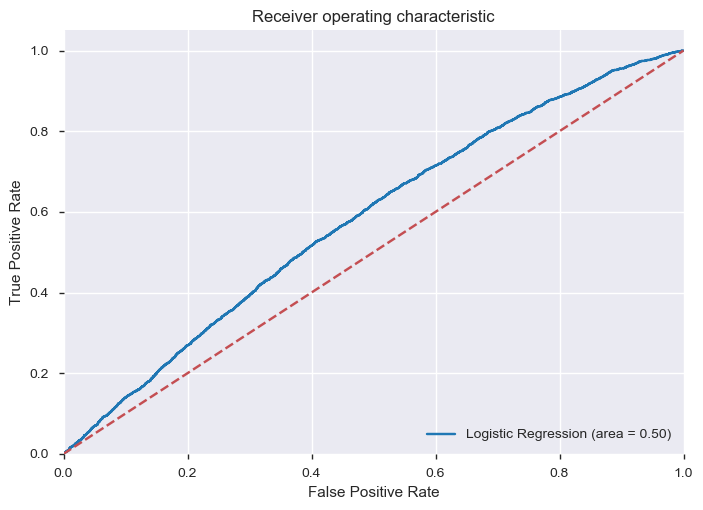

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_new_test, logreg.predict(x_new__test))
fpr, tpr, thresholds = roc_curve(y_new_test, logreg.predict_proba(x_new__test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In this Method, We get Accuracy of 80% for predicting but very low precision and recall Values. ROC curve also not showing good impact.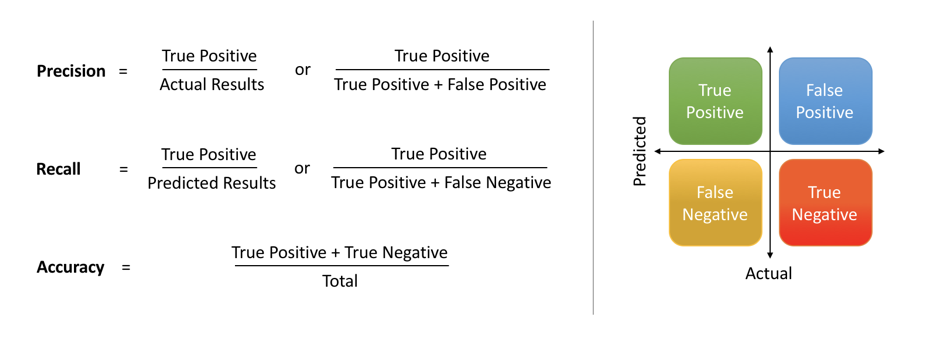

After analysing Precision and recall, We get a conclusion that this model also didn't work for us. May be the reason behind that is unbalanced Data Set. Now In our next Model We will balanced our DataSet and then Perform certain operation.

<a id=section303></a>
## Method 3 (Final Method)

In this method we will balanced our data and will try to predict Probability.

In [515]:
data = pd.read_csv("https://raw.githubusercontent.com/harsh22chauhan/Data-Sets/master/Datasets/Loan%20Data.csv")

In [516]:
data = data.dropna(axis=0, subset=['CustomerID'])

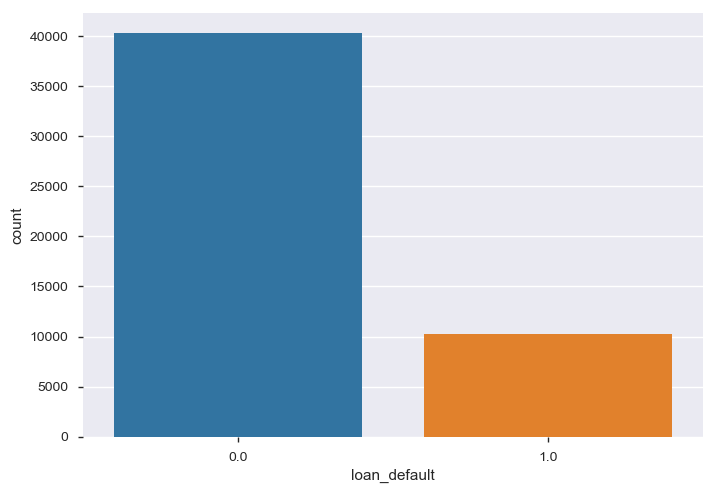

In [517]:
sns.countplot(data['loan_default'])

In [518]:
data['Date.of.Birth']  =  pd.to_datetime(data['Date.of.Birth'],infer_datetime_format=True)

In [519]:
loan_model = data.copy()

In [520]:
loan_model['Birth year'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).year

In [521]:
loan_model['Birth Month'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).month

In [522]:
loan_model['Day of Birth'] = pd.DatetimeIndex(loan_model['Date.of.Birth']).day

In [523]:
a = pd.get_dummies(loan_model['Employment.Type'])

In [524]:
loan_model = pd.concat([loan_model,a],axis = 1)

In [525]:
loan_model.drop(['Date.of.Birth', 'Employment.Type'],axis = 1, inplace = True)

In [527]:
loan_model.columns

Index(['CustomerID', 'Loan Amount', 'Cibil Score', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO of Loan Inquiries', 'loan_default', 'Birth year', 'Birth Month',
       'Day of Birth', 'Salaried', 'Self employed'],
      dtype='object')

In [528]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

#scaling time
scaled_Loan_Amount = scaler.fit_transform(loan_model[['Loan Amount']])
flat_list1 = [item for sublist in scaled_Loan_Amount.tolist() for item in sublist]
scaled_Loan_Amount = pd.Series(flat_list1)

In [529]:
#scaling the amount column
scaled_cibil_score = scaler2.fit_transform(loan_model[['Cibil Score']])
flat_list2 = [item for sublist in scaled_cibil_score.tolist() for item in sublist]
scaled_cibil_score = pd.Series(flat_list2)

In [530]:
#concatenating newly created columns w original df
loan_model = pd.concat([loan_model, scaled_amount.rename('scaled_Loan_Amount'), scaled_time.rename('scaled_Cibil_score')], axis=1)
loan_model.sample(5)

,CustomerID,Loan Amount,Cibil Score,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,loan_default,Birth year,Birth Month,Day of Birth,Salaried,Self employed,scaled_Loan_Amount,scaled_Cibil_score
41454,41455.0,72231.0,583.0,3.0,2.0,1.0,14265.0,64100.0,64100.0,0.0,...,0.0,0.0,0.0,1983,10,15,0,1,0.866018,1.536472
35854,35855.0,43419.0,845.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1975,1,1,0,1,1.633624,-0.849213
20417,20418.0,48457.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1992,5,3,0,1,-0.842051,-0.432057
15434,15435.0,24861.0,615.0,1.0,1.0,0.0,69588.0,96581.0,96581.0,0.0,...,0.0,0.0,1.0,1978,1,6,0,1,0.959771,-2.385848
31036,31037.0,51078.0,15.0,1.0,1.0,0.0,11197.0,11197.0,11197.0,1684.0,...,0.0,1.0,0.0,1990,8,5,0,1,-0.798104,-0.215034


In [531]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 21 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquiries                   50500 non-null float64
loan_default                           50500 non-null float64
Birth year             

In [532]:
loan_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 21 columns):
CustomerID                             50500 non-null float64
Loan Amount                            50500 non-null float64
Cibil Score                            50500 non-null float64
PRI.NO.OF.ACCTS                        50500 non-null float64
PRI.ACTIVE.ACCTS                       50500 non-null float64
PRI.OVERDUE.ACCTS                      50500 non-null float64
PRI.CURRENT.BALANCE                    50500 non-null float64
PRI.SANCTIONED.AMOUNT                  50500 non-null float64
PRI.DISBURSED.AMOUNT                   50500 non-null float64
PRIMARY.INSTAL.AMT                     50500 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           50500 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    50500 non-null float64
NO of Loan Inquiries                   50500 non-null float64
loan_default                           50500 non-null float64
Birth year             

In [533]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(loan_model)) < 0.9
train = loan_model[mask]
test = loan_model[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (45509, 21)
Test Shape: (4991, 21)


In [534]:
# Creating a subsample data set with balanced class distributions

#how many random samples from normal transactions do we need?
no_of_frauds = train.loan_default.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 9220 fraudulent transactions in the train data.


In [535]:

non_fraud = train[train['loan_default'] == 0]
fraud = train[train['loan_default'] == 1]

In [536]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,CustomerID,Loan Amount,Cibil Score,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,loan_default,Birth year,Birth Month,Day of Birth,Salaried,Self employed,scaled_Loan_Amount,scaled_Cibil_score
5136,5137.0,56759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1991,5,1,0,1,-0.842051,0.255363
11184,11185.0,47145.0,300.0,4.0,0.0,2.0,0.0,0.0,0.0,1573.0,...,0.0,0.0,0.0,1981,10,18,0,1,0.036886,-0.540693
4856,4857.0,63447.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1994,12,18,0,1,-0.842051,0.809141
23410,23411.0,47349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1995,1,1,1,0,-0.842051,-0.523802
48787,48788.0,64532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1963,6,22,1,0,-0.842051,0.898981


In [537]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

18440

In [538]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,CustomerID,Loan Amount,Cibil Score,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,loan_default,Birth year,Birth Month,Day of Birth,Salaried,Self employed,scaled_Loan_Amount,scaled_Cibil_score
0,3721.0,63213.0,300.0,49.0,14.0,6.0,3585020.0,3981423.0,4224731.0,50159.0,...,3.0,1.0,0.0,1969,10,5,1,0,0.036886,0.789766
1,48543.0,60947.0,627.0,2.0,1.0,0.0,25447.0,665000.0,665000.0,0.0,...,0.0,0.0,1.0,1972,7,22,1,0,0.994929,0.602137
2,37536.0,67819.0,627.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1982,3,19,0,1,0.994929,1.171151
3,33168.0,59473.0,753.0,1.0,1.0,0.0,5122.0,104000.0,18631.0,0.0,...,1.0,0.0,1.0,1983,3,10,1,0,1.364083,0.480087
4,5131.0,43549.0,690.0,1.0,1.0,0.0,1695.0,2761.0,2761.0,0.0,...,0.0,0.0,0.0,1987,1,1,0,1,1.179506,-0.838448
5,17256.0,54303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1994,7,6,1,0,-0.842051,0.052002
6,9555.0,46366.0,726.0,8.0,2.0,0.0,35047.0,66000.0,66000.0,14115.0,...,0.0,0.0,1.0,1987,11,15,1,0,1.284978,-0.605196
7,28950.0,58542.0,603.0,3.0,1.0,0.0,57000.0,57000.0,57000.0,4535.0,...,1.0,0.0,1.0,1988,1,1,0,1,0.924614,0.402999
8,20958.0,66882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1997,8,15,1,0,-0.842051,1.093565
9,31838.0,50073.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1974,1,1,0,1,-0.842051,-0.298250


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

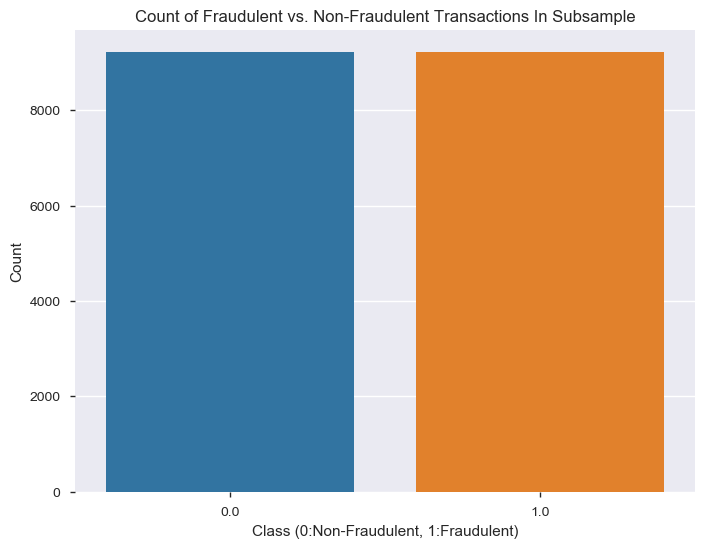

In [539]:
new_counts = subsample.loan_default.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [540]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['loan_default']]
corr

,loan_default
CustomerID,0.010002
Loan Amount,0.108355
Cibil Score,-0.072977
PRI.NO.OF.ACCTS,-0.043863
PRI.ACTIVE.ACCTS,-0.050914
PRI.OVERDUE.ACCTS,0.043998
PRI.CURRENT.BALANCE,-0.038657
PRI.SANCTIONED.AMOUNT,-0.044844
PRI.DISBURSED.AMOUNT,-0.044624
PRIMARY.INSTAL.AMT,-0.013720


In [541]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

c2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]
len_after = len(c2)
len_before = len(subsample)
len_difference = len(subsample) - len(c2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 18440 transactions by 7405 transactions to 11035 transactions.


In [542]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 2 to 18437
Data columns (total 21 columns):
CustomerID                             11035 non-null float64
Loan Amount                            11035 non-null float64
Cibil Score                            11035 non-null float64
PRI.NO.OF.ACCTS                        11035 non-null float64
PRI.ACTIVE.ACCTS                       11035 non-null float64
PRI.OVERDUE.ACCTS                      11035 non-null float64
PRI.CURRENT.BALANCE                    11035 non-null float64
PRI.SANCTIONED.AMOUNT                  11035 non-null float64
PRI.DISBURSED.AMOUNT                   11035 non-null float64
PRIMARY.INSTAL.AMT                     11035 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           11035 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    11035 non-null float64
NO of Loan Inquiries                   11035 non-null float64
loan_default                           11035 non-null float64
Birth year             

In [543]:
c1 = c2[['CustomerID','PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','Loan Amount', 'Cibil Score','Birth year','Birth Month','Day of Birth']]

In [544]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 2 to 18437
Data columns (total 10 columns):
CustomerID               11035 non-null float64
PRI.CURRENT.BALANCE      11035 non-null float64
PRI.SANCTIONED.AMOUNT    11035 non-null float64
PRI.DISBURSED.AMOUNT     11035 non-null float64
PRIMARY.INSTAL.AMT       11035 non-null float64
Loan Amount              11035 non-null float64
Cibil Score              11035 non-null float64
Birth year               11035 non-null int64
Birth Month              11035 non-null int64
Day of Birth             11035 non-null int64
dtypes: float64(7), int64(3)
memory usage: 948.3 KB


In [545]:
c1.head()

,CustomerID,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,Loan Amount,Cibil Score,Birth year,Birth Month,Day of Birth
2,37536.0,0.0,0.0,0.0,0.0,67819.0,627.0,1982,3,19
4,5131.0,1695.0,2761.0,2761.0,0.0,43549.0,690.0,1987,1,1
5,17256.0,0.0,0.0,0.0,0.0,54303.0,0.0,1994,7,6
9,31838.0,0.0,0.0,0.0,0.0,50073.0,0.0,1974,1,1
10,45053.0,0.0,0.0,0.0,0.0,68069.0,0.0,1993,11,21


In [546]:
X = c2.drop((['CustomerID','PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','Loan Amount', 'Cibil Score','Birth year','Birth Month','Day of Birth','loan_default']),axis = 1)

In [547]:


#X = c2.drop('loan_default', axis=1)
y = c2['loan_default']


In [548]:
## Classification Algorithms


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [549]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [550]:
X_train.head()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,Salaried,Self employed,scaled_Loan_Amount,scaled_Cibil_score
2391,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-0.842051,0.301235
10187,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-0.842051,0.213962
1715,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-0.842051,1.061273
1177,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-0.842051,0.131160
4922,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-0.842051,0.089760


In [551]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (8828, 10) (2207, 10) 

Y_shapes:
 Y_train: Y_validation:
 (8828,) (2207,)


In [552]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [553]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.588329 (0.013231)
LDA: 0.588345 (0.013137)
KNN: 0.542747 (0.014721)
CART: 0.534339 (0.020931)
SVM: 0.590725 (0.012338)
RF: 0.542818 (0.016774)


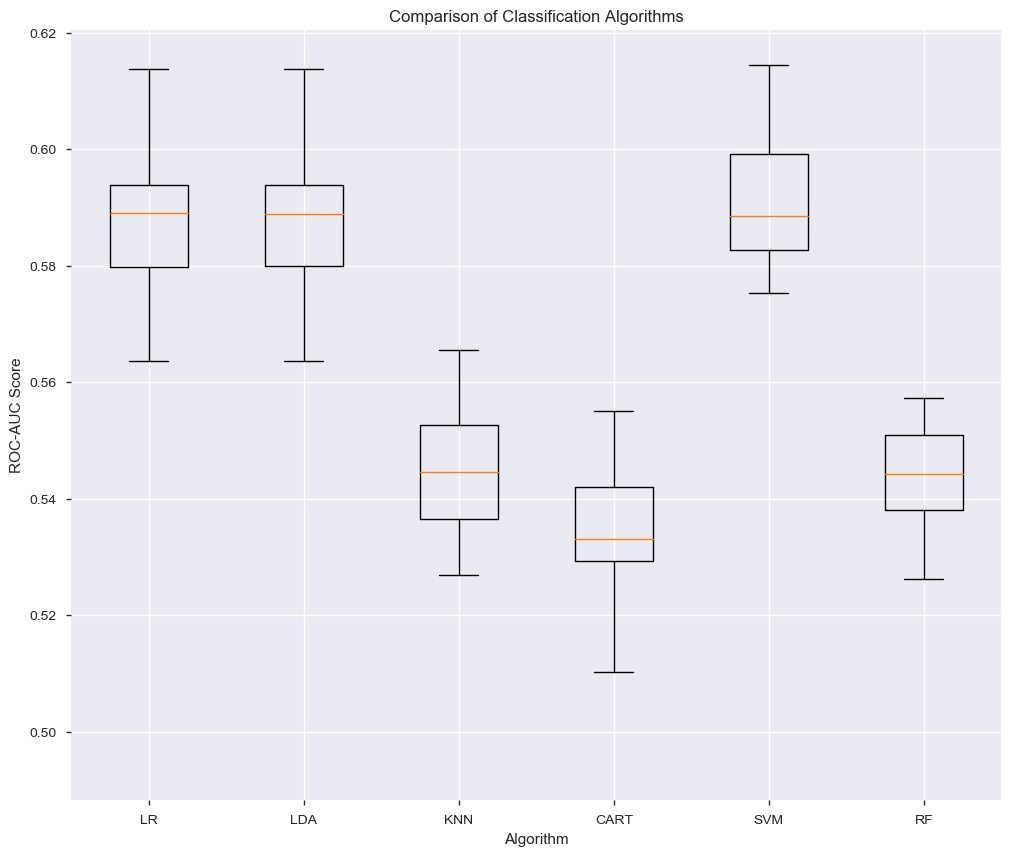

In [554]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

After Balancing our data and removing Extreme outliers from our Dataset. We use multiple classification Algorithm for prdicting Loan default. Although We didn't get high accuracy but our precisionn and recall score is good as compare to our previous model.
For Bussiness purpose and prediction of probabilities we have to use Logistic Regression. implemantation of Logistic Regression Model with predicting probabilities is done in further Steps.

In [555]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)

[[-0.13935452  0.07664972  0.          0.          0.          0.
   0.09407331  0.28016843 -0.07461218  0.29204891]]
[-0.19032958]


## These are the coefficients that can we use for generalizing a equation for credit Scoring

In [557]:
y_pred = logreg.predict(X_test)

In [558]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [560]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[585 501]
 [489 632]]


In [561]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.562


In [562]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54      1086
         1.0       0.56      0.56      0.56      1121

   micro avg       0.55      0.55      0.55      2207
   macro avg       0.55      0.55      0.55      2207
weighted avg       0.55      0.55      0.55      2207



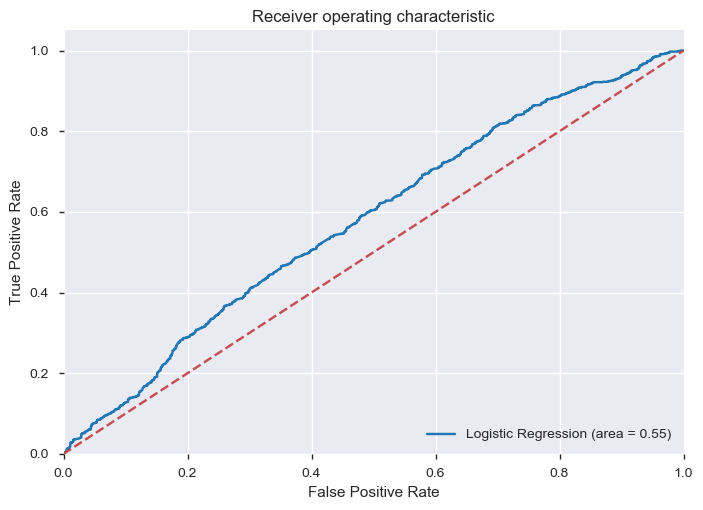

In [563]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [564]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 2 to 18437
Data columns (total 10 columns):
PRI.NO.OF.ACCTS                        11035 non-null float64
PRI.ACTIVE.ACCTS                       11035 non-null float64
PRI.OVERDUE.ACCTS                      11035 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           11035 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    11035 non-null float64
NO of Loan Inquiries                   11035 non-null float64
Salaried                               11035 non-null uint8
Self employed                          11035 non-null uint8
scaled_Loan_Amount                     11035 non-null float64
scaled_Cibil_score                     11035 non-null float64
dtypes: float64(8), uint8(2)
memory usage: 797.5 KB


In [565]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 2 to 18437
Data columns (total 10 columns):
CustomerID               11035 non-null float64
PRI.CURRENT.BALANCE      11035 non-null float64
PRI.SANCTIONED.AMOUNT    11035 non-null float64
PRI.DISBURSED.AMOUNT     11035 non-null float64
PRIMARY.INSTAL.AMT       11035 non-null float64
Loan Amount              11035 non-null float64
Cibil Score              11035 non-null float64
Birth year               11035 non-null int64
Birth Month              11035 non-null int64
Day of Birth             11035 non-null int64
dtypes: float64(7), int64(3)
memory usage: 948.3 KB


In [566]:
final = pd.concat([c1,X],axis = 1)

In [567]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 2 to 18437
Data columns (total 20 columns):
CustomerID                             11035 non-null float64
PRI.CURRENT.BALANCE                    11035 non-null float64
PRI.SANCTIONED.AMOUNT                  11035 non-null float64
PRI.DISBURSED.AMOUNT                   11035 non-null float64
PRIMARY.INSTAL.AMT                     11035 non-null float64
Loan Amount                            11035 non-null float64
Cibil Score                            11035 non-null float64
Birth year                             11035 non-null int64
Birth Month                            11035 non-null int64
Day of Birth                           11035 non-null int64
PRI.NO.OF.ACCTS                        11035 non-null float64
PRI.ACTIVE.ACCTS                       11035 non-null float64
PRI.OVERDUE.ACCTS                      11035 non-null float64
NEW.ACCTS.IN.LAST.SIX.MONTHS           11035 non-null float64
DELINQUENT.ACCTS.IN.LAST.SIX.

In [568]:
final.head()

,CustomerID,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,Loan Amount,Cibil Score,Birth year,Birth Month,Day of Birth,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO of Loan Inquiries,Salaried,Self employed,scaled_Loan_Amount,scaled_Cibil_score
2,37536.0,0.0,0.0,0.0,0.0,67819.0,627.0,1982,3,19,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0.994929,1.171151
4,5131.0,1695.0,2761.0,2761.0,0.0,43549.0,690.0,1987,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,1.179506,-0.838448
5,17256.0,0.0,0.0,0.0,0.0,54303.0,0.0,1994,7,6,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-0.842051,0.052002
9,31838.0,0.0,0.0,0.0,0.0,50073.0,0.0,1974,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,-0.842051,-0.298250
10,45053.0,0.0,0.0,0.0,0.0,68069.0,0.0,1993,11,21,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-0.842051,1.191851


In [576]:

x =pd.DataFrame(logreg.predict_proba(X),columns = ['prob of Not default','Prob of default'],index = final['CustomerID'])

In [577]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11035 entries, 37536.0 to 22746.0
Data columns (total 2 columns):
prob of Not default    11035 non-null float64
Prob of default        11035 non-null float64
dtypes: float64(2)
memory usage: 258.6 KB


In [578]:
x.isnull().sum()

prob of Not default    0
Prob of default        0
dtype: int64

In [579]:
x.head()

,prob of Not default,Prob of default
CustomerID,,
37536.0,0.445645,0.554355
5131.0,0.575845,0.424155
17256.0,0.504560,0.495440
31838.0,0.483615,0.516385
45053.0,0.421980,0.578020


In [580]:
x.drop(['Prob of default'],axis =1,inplace = True)

In [582]:
x['Credit_limit'] = x['prob of Not default']*50000 #you can multiply it with any number to get a certain score.

In [583]:
x.head()

,prob of Not default,Credit_limit
CustomerID,,
37536.0,0.445645,22282.235024
5131.0,0.575845,28792.247780
17256.0,0.504560,25228.017126
31838.0,0.483615,24180.760065
45053.0,0.421980,21099.008434


In [595]:
x['level of credit limit']=0
x.loc[(x['prob of Not default']>=0)&(x['prob of Not default']<=0.30),'level of credit limit']= 'low'
x.loc[(x['prob of Not default']>0.30)&(x['prob of Not default']<=0.55),'level of credit limit']= 'Medium'
x.loc[(x['prob of Not default']>0.55),'level of credit limit']= 'High'

In [596]:
x.head()

,prob of Not default,Credit_limit,level of credit limit
CustomerID,,,
37536.0,0.445645,22282.235024,Medium
5131.0,0.575845,28792.247780,High
17256.0,0.504560,25228.017126,Medium
31838.0,0.483615,24180.760065,Medium
45053.0,0.421980,21099.008434,Medium


In [597]:
x.to_csv('Credit_limit.csv')

After Puting a lot of effort, We are here with a subset of our data which contains credit limit and level of credit limit. Data file is attached with the assignment.

<a id=section4></a>
# Conclusion
1. In a very First Step, we just do a exploratory Data analysis of our data to get the proper insights from it. We use some visualization to get much information from it. We treat Null values in the data.

2. In second Step, we implement a linear Regression model to predict the loan amount. As we are not able to explain variance in this model so we have to move towards another model.

3. In Third step, We implement logistic regression to predict the Loan Ddefault. Although We get a good accuracy in this model but our precision and recall score is not so good. This is the reason for going towards another model.

4. In Final Step, We just balanced our data set then implemant different ML algorithm to it. For Business purpose we use Logistic regeression and determine the probabilities of default an not default. On the basis of these proababilities we just prdict the credit limit.

5. I hope this model will work but I also think about dividing the data into clusters.

Finally, After giving my two days I am here to conclude it. May be it will not so good but Please give me an oppertunity I will prove my worth. I need this oppertunity.
 Thank you